<a href="https://colab.research.google.com/github/paolaPosada/IntroIA_2022/blob/main/01_ProyectoEntrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking 2015

---



In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'https://res.cloudinary.com/djljdabgc/raw/upload/v1660773479/hotel_booking_2015_zl7you.csv'
df = pd.read_csv (path)

In [ ]:
# Dimensiones del dataset
print(df.shape)

(21996, 36)


In [ ]:
# Tipos de datos
df.dtypes.value_counts()

object     16
int64      16
float64     4
dtype: int64

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21996 entries, 0 to 21995
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21996 non-null  object 
 1   is_canceled                     21996 non-null  int64  
 2   lead_time                       21996 non-null  int64  
 3   arrival_date_year               21996 non-null  int64  
 4   arrival_date_month              21996 non-null  object 
 5   arrival_date_week_number        21996 non-null  int64  
 6   arrival_date_day_of_month       21996 non-null  int64  
 7   stays_in_weekend_nights         21996 non-null  int64  
 8   stays_in_week_nights            21996 non-null  int64  
 9   adults                          21996 non-null  int64  
 10  children                        21992 non-null  float64
 11  babies                          21996 non-null  int64  
 12  meal                            

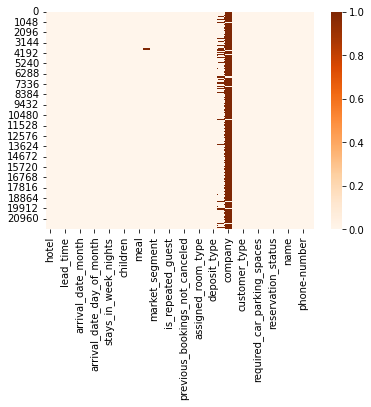

In [ ]:
#Datos faltantes, grafica
sns.heatmap(df.isna(),cmap='Oranges')

In [ ]:
#Eliminacion de caracteristicas no relevantes
df.drop(['credit_card','phone-number','email','name','arrival_date_year','reservation_status_date'],axis=1,inplace=True)

In [ ]:
#Verificacion de los datos de cada caracteristica
for col in df.columns:
     print(col)
     print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
is_canceled
[0 1]
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

In [ ]:
print(df['children'].unique())
df['children'] = df['children'].fillna(value=0)
df['children'] = df['children'].astype(int)
print(df['children'].unique())

[ 0.  1.  2. 10.  3. nan]
[ 0  1  2 10  3]


In [ ]:
print(df['company'].unique())
df['company'] = df['company'].fillna(value=0)
df['company'] = df['company'].astype('category').cat.codes
print(df['company'].unique())

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 120.  82.  81. 103. 135.  31.  61.  92.  86. 291. 292.   9. 325. 331.
  43. 287. 297.  20. 329.  28.  77. 200.  42. 338.  83. 108.  51.  72.
 246. 319. 159. 323.  88. 278. 337.  16.  80.  62.  84. 137. 343. 346.
 347. 349. 289. 351. 356. 355. 353. 290.  54.  40.  45.  38.  49.  48.
  67.  68.  65.  91.  37.   8.  46.  76.  96. 100. 116. 115. 105.  93.
 101. 122.  11. 139. 142. 127. 130. 143. 148. 107. 140. 149. 160. 163.]
[  0  49  50  80  72  77  67  64  91  79  22  75  92  94  41  71  81  73
  76  93  83  53  20  84   4  16  97 103  54  33  32  45  58   8  23  39
  36  88  89   2  98 100  13  85  90   6  99   7  30  74  12 102  34  48
  19  28  78  95  68  96  37  82 101   5  31  24  35  59 104 105 106 107
  86 108 111 110 109  87  21  11  14  10  18  17  26  27  25  38   9   1
  15  29  42  43  52  51  46  40  44  55   3  60  62  56  57  63  

In [ ]:
print(df['agent'].unique())
df['agent'] = df['agent'].fillna(value=0)
df['agent'] = df['agent'].astype('category').cat.codes
print(df['agent'].unique())

[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308.  78. 201. 252. 183.  47. 128. 114.  66. 245. 301.
 193.   1. 182. 339. 336. 135. 332. 348. 350. 352. 195.  13.  11.   7.
  27.  14.  22.  17.  10.  28.  42.  20.  19.  45.  34.  37.  57.  61.
  16.  39.  21.  24.  41.  50.  30.  54.  52.  12.  44.  64.  31.  83.
  32.  63.  60.  55.  56.  89.   4.  72.  75.  70.  82.  81.  79.  85.
  74.  86.  92.  94.  99.  90.  87. 112. 117.  98. 106. 111. 119. 148.
 151. 138.  91. 103. 121. 158. 168. 118.]
[  0 143 123 142  15 124   8 130  86   5 111  94 106 126 125   3  80  35
 100 145 116  75   2  92  74  99   9 112   6  98 127 102 108 140 110 144
  52 120 104  97 136  79  31  2

In [ ]:
print(df['country'].unique())
df['country'] = df['country'].fillna(value='NC')
df['country'] = df['country'].astype('category').cat.codes
print(df['country'].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'NZL' 'HUN' 'IDN' 'HRV'
 'KAZ' 'THA' 'COL' 'DOM' 'MKD' 'MYS' 'NGA' 'VEN' 'GIB' 'ARM' 'JPN' 'LKA'
 'TUN' 'STP' 'BGR' 'TWN' 'IRN' 'AZE' 'LBN' 'SVK' 'CMR' 'SGP' 'SEN' 'PER'
 'EGY' 'SAU' 'KNA' 'JOR' 'KWT' 'ETH' 'PHL' 'LIE' 'MMR' 'IRQ' 'PAN' 'GEO'
 'TMP' 'MUS' 'ECU']
[76 33 94 28 41 32 65 77 68 70  2 74 22  7 12 16 36 45 67 23 78 87  4 29
 21 10 31 62 11 56 86  1 40 14 59 58 93 82 57 75 83 13  5  9 55 91 96  0
 44 20 97 18 98 25 50 19 69 38 39 37 48 88 17 24 60 64 66 95 35  3 47 54
 90 84  8 92 42  6 52 85 15 81 80 72 27 79 49 46 51 30 73 53 61 43 71 34
 89 63 26]


In [ ]:
df['hotel'] = df['hotel'].astype('category').cat.codes
df['arrival_date_month'].replace(to_replace=['July', 'August', 'September','October','November','December'], value=[7,8,9,10,11,12], inplace=True)
df['meal'].replace(to_replace=['BB', 'FB', 'HB','SC','Undefined'], value=[1,2,3,4,0], inplace=True)
df['market_segment'].replace(to_replace=['Direct','Corporate','Online TA','Offline TA/TO','Complementary','Groups','Undefined'], value=[1,2,3,4,5,6,0], inplace=True)
df['distribution_channel'].replace(to_replace=['Direct','Corporate','TA/TO','GDS','Undefined'], value=[1,2,3,4,0], inplace=True)
df['reserved_room_type'].replace(to_replace=['A','B','C','D','E','F','G','H','L'], value=[1,2,3,4,5,6,7,8,11], inplace=True)
df['assigned_room_type'].replace(to_replace=['A','B','C','D','E','F','G','H','I','K','L'], value=[1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['deposit_type'].replace(to_replace=['No Deposit','Refundable','Non Refund'], value=[1,2,3], inplace=True)
df['customer_type'].replace(to_replace=['Transient','Contract','Transient-Party','Group'], value=[1,2,3,4], inplace=True)
df['reservation_status'].replace(to_replace=['Check-Out','Canceled','No-Show'], value=[1,2,3], inplace=True)

In [ ]:
toDel = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status'];

for i in toDel:
  df[i] = df[i].astype('int')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


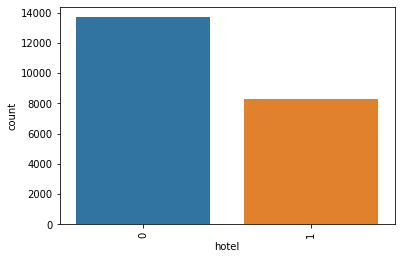

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


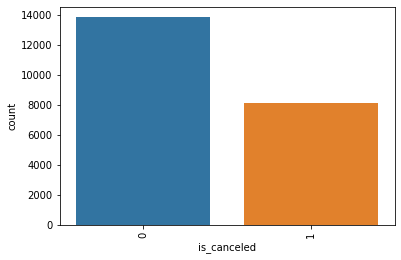

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


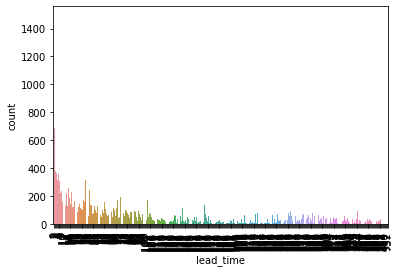

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


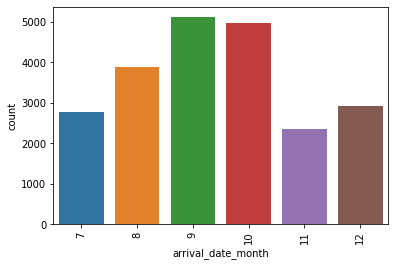

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


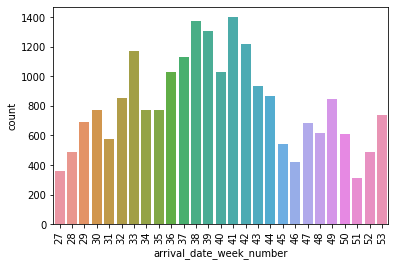

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


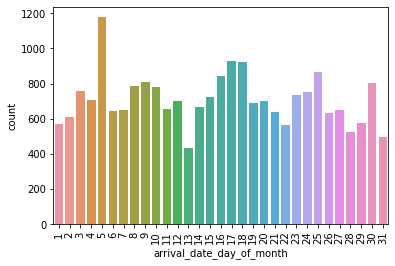

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


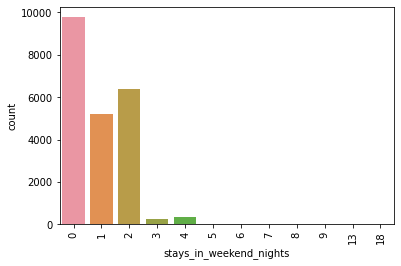

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


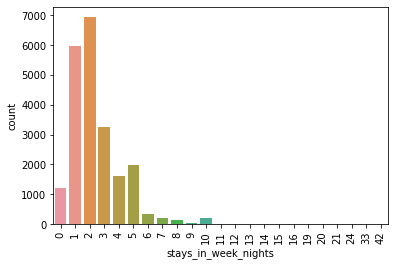

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


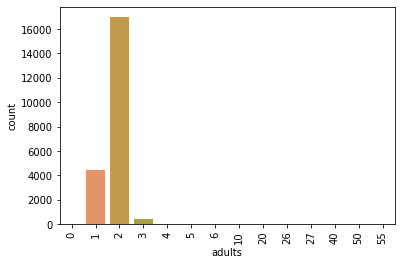

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


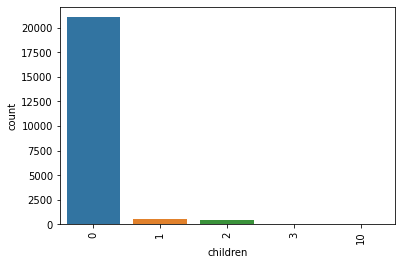

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


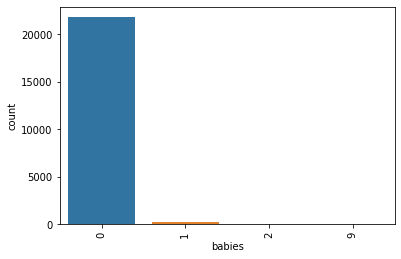

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


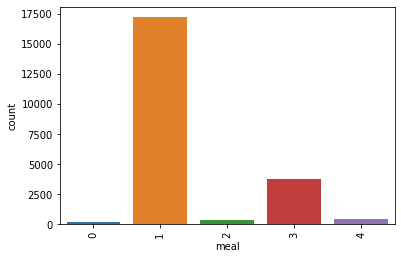

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


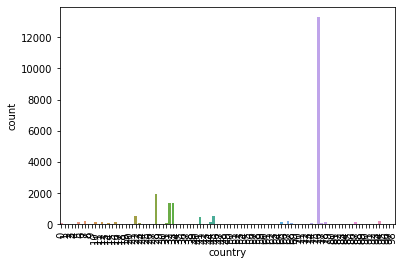

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


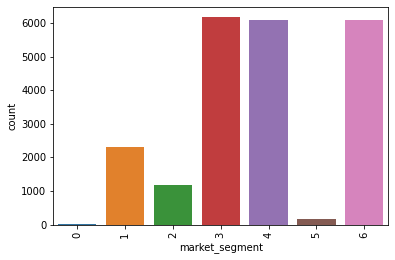

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


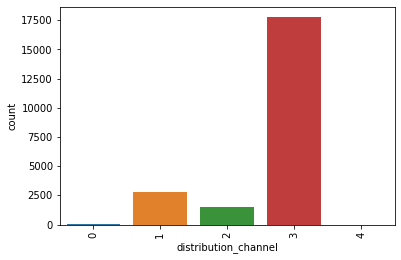

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


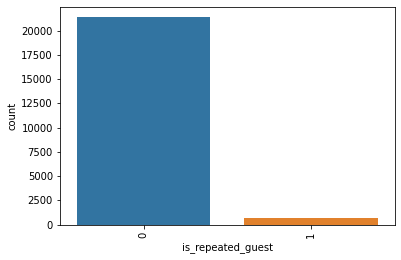

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


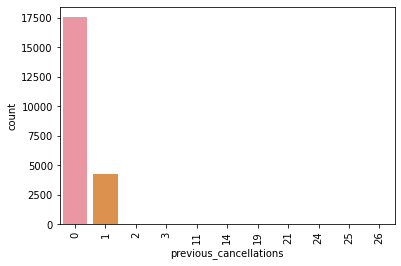

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


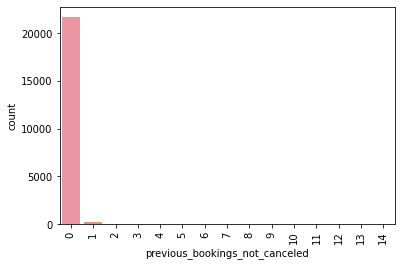

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


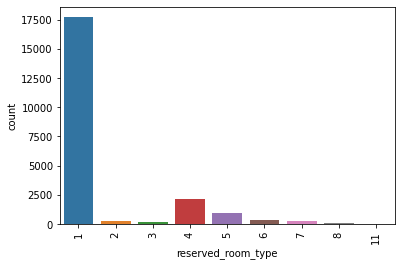

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


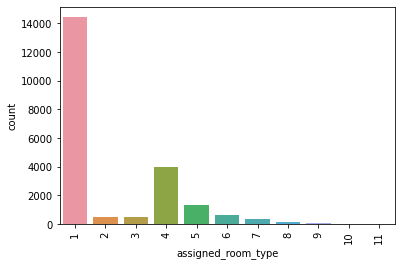

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


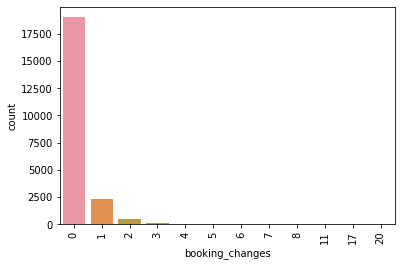

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


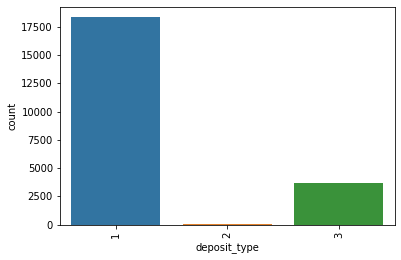

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


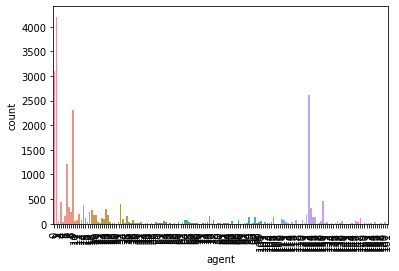

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


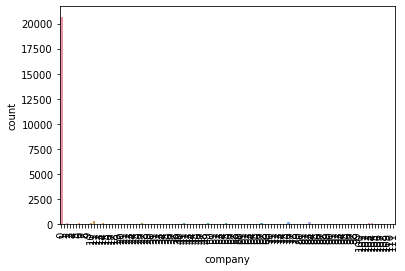

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


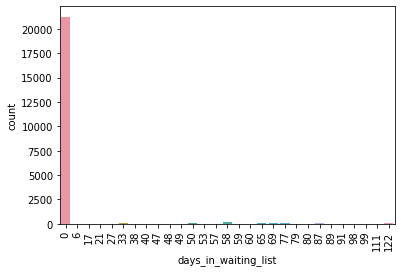

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


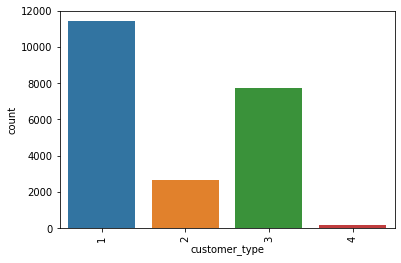

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


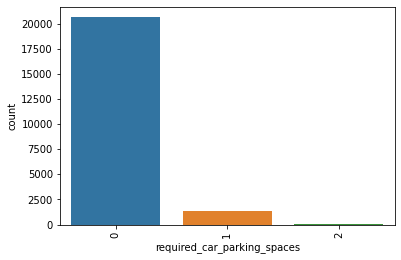

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


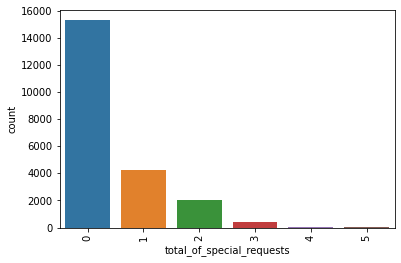

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


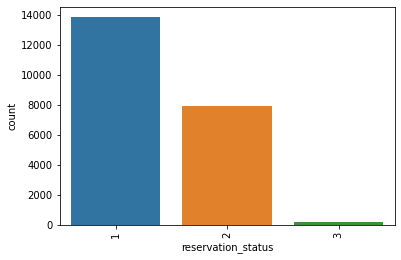

In [ ]:
categorical_col=[column for column in df.columns if (df[column].dtype=='int')]

for column in categorical_col:
    sns.countplot(df[column])
    plt.xticks(rotation='90')
    plt.show()

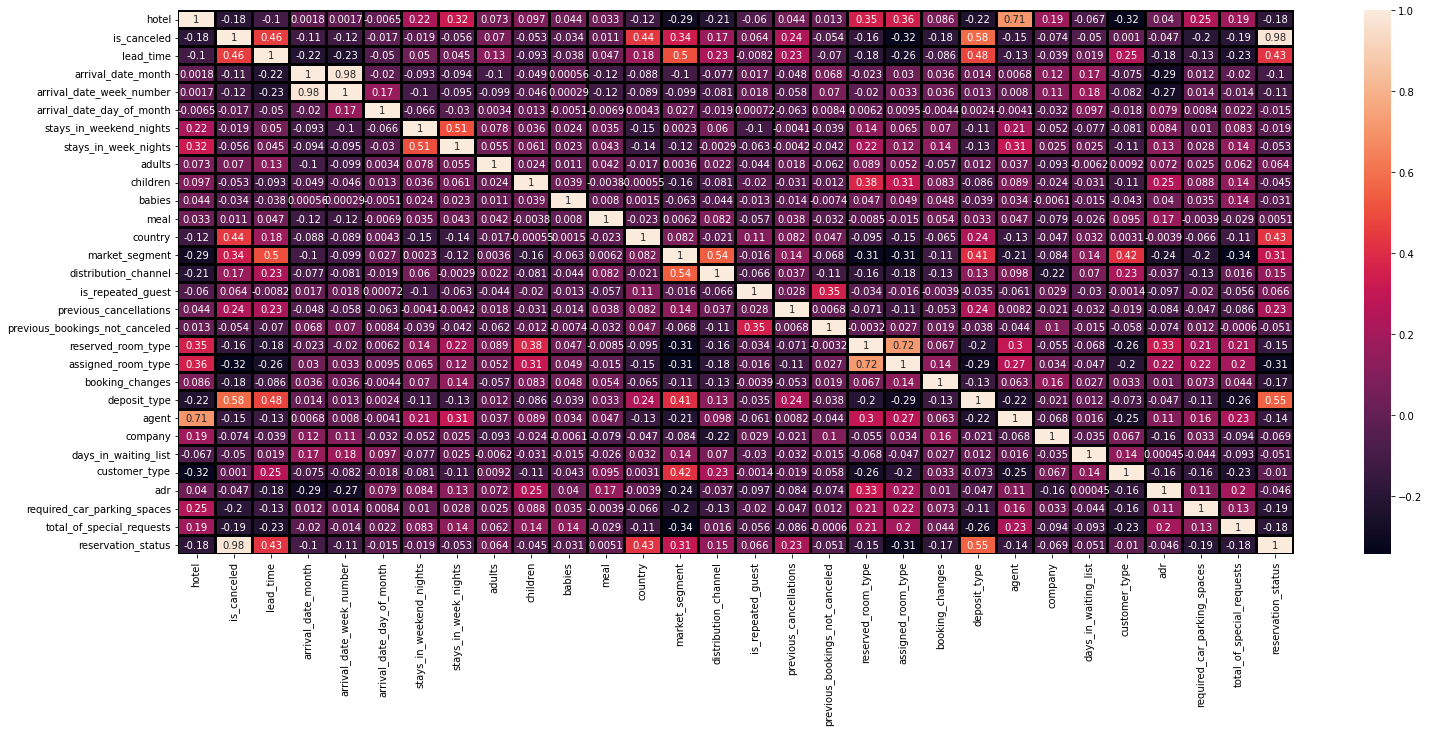

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=2)

In [ ]:
#Alta correlacion entre esta variable y la variable respuesta se elimina (basicamente las 2 variables entan diciendo lo mismo)
df.drop(['reservation_status'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21996 entries, 0 to 21995
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21996 non-null  int64  
 1   is_canceled                     21996 non-null  int64  
 2   lead_time                       21996 non-null  int64  
 3   arrival_date_month              21996 non-null  int64  
 4   arrival_date_week_number        21996 non-null  int64  
 5   arrival_date_day_of_month       21996 non-null  int64  
 6   stays_in_weekend_nights         21996 non-null  int64  
 7   stays_in_week_nights            21996 non-null  int64  
 8   adults                          21996 non-null  int64  
 9   children                        21996 non-null  int64  
 10  babies                          21996 non-null  int64  
 11  meal                            21996 non-null  int64  
 12  country                         

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


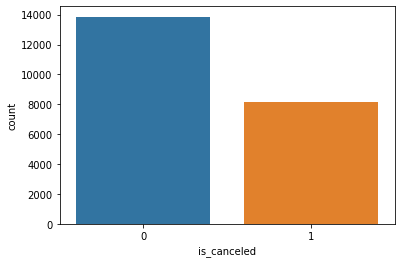

In [ ]:
sns.countplot(df['is_canceled'])

In [ ]:
df['is_canceled'].value_counts()

0    13854
1     8142
Name: is_canceled, dtype: int64

## **Random forest**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
y = df['is_canceled']
X = scaler.fit_transform(df.drop(['is_canceled'],axis=1))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
import joblib

def gridSearch(model,params,X,Y,VALID_SIZE,FOLDS=3):
    skf = StratifiedKFold(n_splits=FOLDS)
    scoring = {'AUC': 'roc_auc', 'Accuracy':'balanced_accuracy'}
    
    gs = GridSearchCV(model,scoring=scoring, cv=skf, param_grid=params, return_train_score=True, n_jobs=-1, refit='AUC', verbose=3)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=VALID_SIZE, shuffle=True)
    class_weightsTrain = compute_class_weight(class_weight = 'balanced', classes = np.unique(Y_train),y = Y_train)
    gs.fit(X_train, Y_train)
    print(gs.best_estimator_)
    print(np.abs(gs.best_score_))
    return gs,X_test,Y_test

In [ ]:
estimadores=[5,10,20,50,100,200,250]
features = [4,8,12,"auto"]
criterion=["gini","entropy"]

param_grid = {'n_estimators': estimadores, 'max_features' : features,'criterion':criterion}
rf = RandomForestClassifier(class_weight='balanced')
gs,_,_ = gridSearch(rf,param_grid,X,y,0.2)
#joblib.dump(gs, 'gs_rf.pkl') #se guarda el gs para su posterior uso

Fitting 3 folds for each of 56 candidates, totalling 168 fits
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=8, n_estimators=200)
0.9846535828015716


In [ ]:
joblib.dump(gs, 'RandomForest_gs.pkl') #se guarda el gs para su posterior uso

['RandomForest_gs.pkl']

In [ ]:
 pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt #Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 

def experimentar(X,Y,oversampling=False):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 4 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba (exactitud/eficiencia) de claisficacion y desviación estandar        
    """
    #Validamos el modelo
    Folds = 10
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X[train,:]
        Ytrain = Y[train]
        Xtest = X[test, :]
        Ytest = Y[test]
        #Normalizamos los datos
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        model = RandomForestClassifier(class_weight='balanced', criterion='entropy', n_estimators=200,n_jobs=-1)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1385
           1       0.97      0.87      0.92       814

    accuracy                           0.94      2199
   macro avg       0.95      0.93      0.94      2199
weighted avg       0.94      0.94      0.94      2199



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.870113,0.127721,0.796034,0.135428


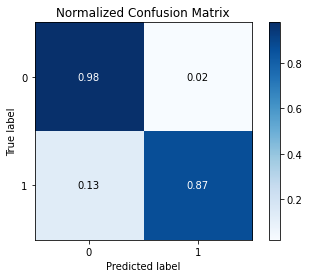

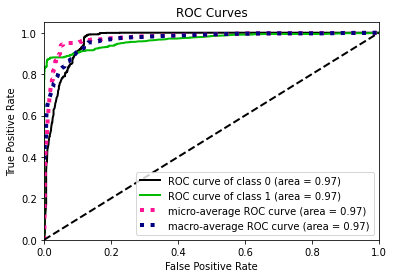

In [ ]:
experimentar(X,y)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1385
           1       0.96      0.88      0.92       814

    accuracy                           0.94      2199
   macro avg       0.95      0.93      0.94      2199
weighted avg       0.94      0.94      0.94      2199



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.86396,0.131016,0.793234,0.134488


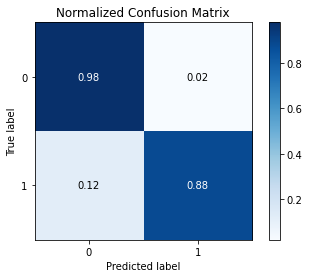

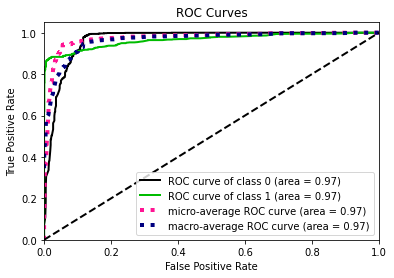

In [ ]:
experimentar(X,y,oversampling=True)

In [ ]:
resultadoRF = joblib.load('RandomForest_gs.pkl')

In [ ]:
resultado=pd.DataFrame(resultadoRF.cv_results_)

In [ ]:
resultado[['params','mean_test_AUC','std_test_AUC','mean_test_Accuracy','std_test_Accuracy']].sort_values(['mean_test_AUC'], ascending=[False]) 

,params,mean_test_AUC,std_test_AUC,mean_test_Accuracy,std_test_Accuracy
40,"{'criterion': 'entropy', 'max_features': 8, 'n...",0.984654,0.000758,0.931509,0.003036
41,"{'criterion': 'entropy', 'max_features': 8, 'n...",0.984641,0.000791,0.933129,0.003548
54,"{'criterion': 'entropy', 'max_features': 'auto...",0.984470,0.000941,0.931081,0.002828
48,"{'criterion': 'entropy', 'max_features': 12, '...",0.984467,0.000799,0.932992,0.003605
47,"{'criterion': 'entropy', 'max_features': 12, '...",0.984397,0.000968,0.931878,0.002791
55,"{'criterion': 'entropy', 'max_features': 'auto...",0.984372,0.000923,0.931193,0.003531
13,"{'criterion': 'gini', 'max_features': 8, 'n_es...",0.984330,0.000758,0.931778,0.002664
12,"{'criterion': 'gini', 'max_features': 8, 'n_es...",0.984330,0.001001,0.931103,0.002423
34,"{'criterion': 'entropy', 'max_features': 4, 'n...",0.984199,0.000839,0.929723,0.002947
46,"{'criterion': 'entropy', 'max_features': 12, '...",0.984196,0.000987,0.931370,0.003098
